## (1) Data Description

For this project, I’m working with two datasets collected from a UBC Minecraft research server. The first dataset, `players.csv`, includes one row per participant and contains information such as each player's hashed email, their age, gender, experience with Minecraft, total played hours, and whether they subscribed to the project newsletter. These variables give a general sense of who the players are and how familiar they are with the game.

The second dataset, `sessions.csv`, is much longer and includes one row per individual gameplay session. It contains each player's hashed email along with timestamps for when sessions started and ended. Since active players can appear many times in this file, session lengths and frequencies vary a lot.

To link both datasets, I used `hashedEmail` as the unique identifier. I counted how many sessions each player contributed and merged that information back into the players dataset, creating a new variable called `num_sessions`. The final combined dataset has one row per player, along with demographic variables, experience-related features, and their total number of sessions.

A few issues are worth noting: session counts are very skewed (most players contribute only a small number), and some variables in `players.csv` contain missing values. Still, the dataset is well-structured and allows us to investigate which types of players tend to be more active on the server.

In [3]:
library(tidyverse)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
session_counts <- sessions %>%
  count(hashedEmail, name = "num_sessions")

players_extended <- players %>%
  left_join(session_counts, by = "hashedEmail")

summary(players_extended)


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age         num_sessions   
 Length:196         Length:196         Min.   : 9.00   Min.   :  1.00  
 Class :character   Class :character   1st Qu.:17.00   1st Qu.:  1.00  
 Mode  :character   Mode  :character   Median :19.00   Median :  1.00  
                                       Mean   :21.14   Mean   : 12.28  
                                       3rd Qu.:22.75   3

In [5]:
players %>% 
  summarize(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


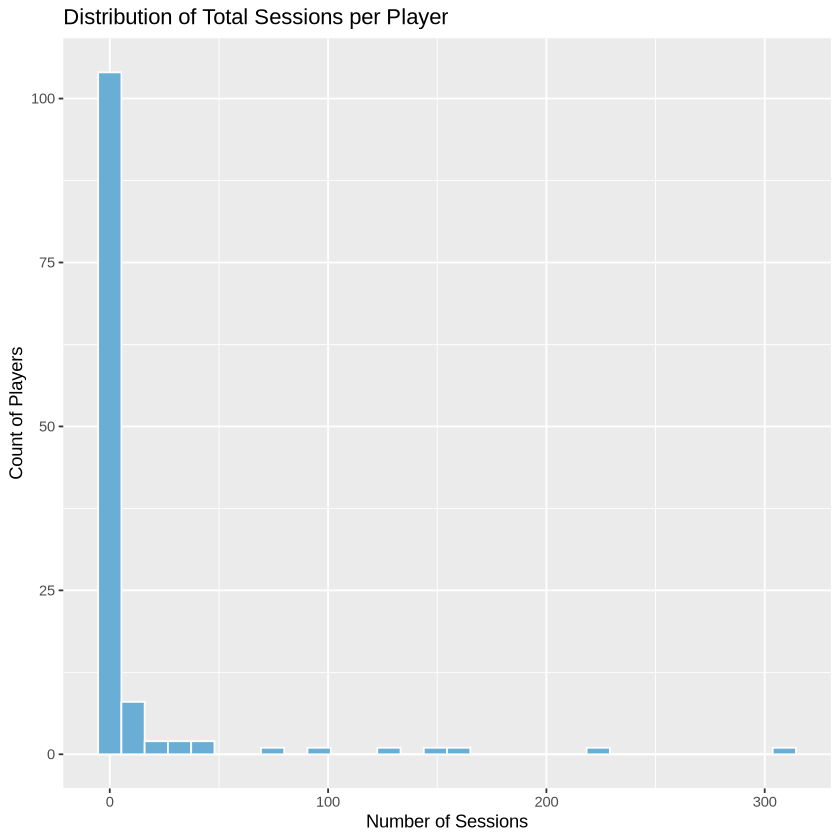

In [6]:
ggplot(players_extended, aes(num_sessions)) +
  geom_histogram(bins = 30, fill = "#6AAED6", color = "white") +
  labs(
    title = "Distribution of Total Sessions per Player",
    x = "Number of Sessions",
    y = "Count of Players"
  )

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


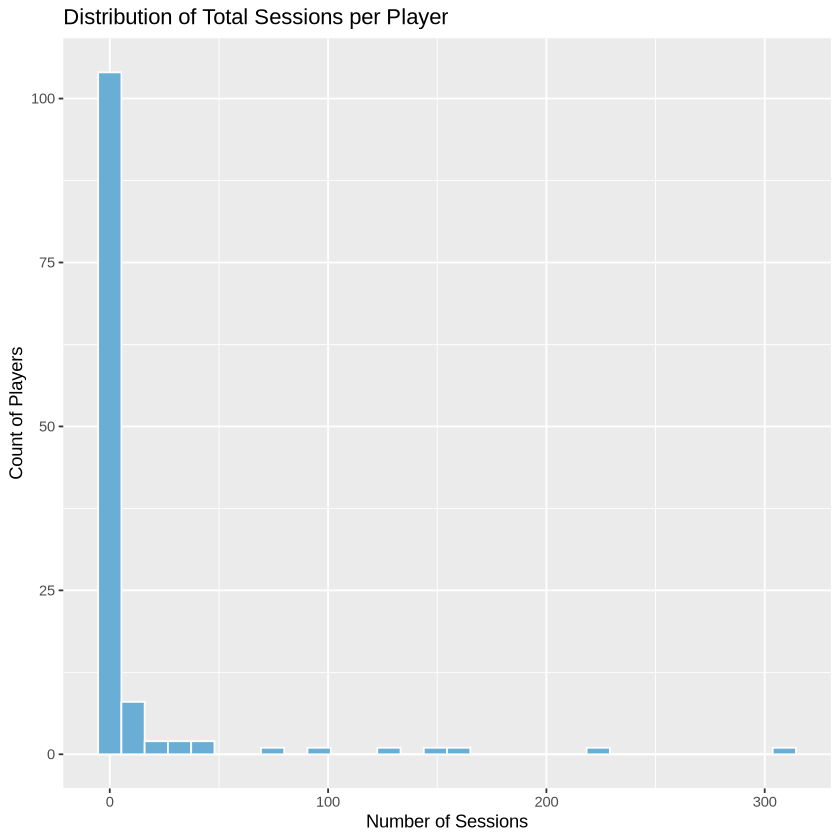

In [7]:
ggplot(players_extended, aes(num_sessions)) +
  geom_histogram(bins = 30, fill = "#6AAED6", color = "white") +
  labs(
    title = "Distribution of Total Sessions per Player",
    x = "Number of Sessions",
    y = "Count of Players"
  )


Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


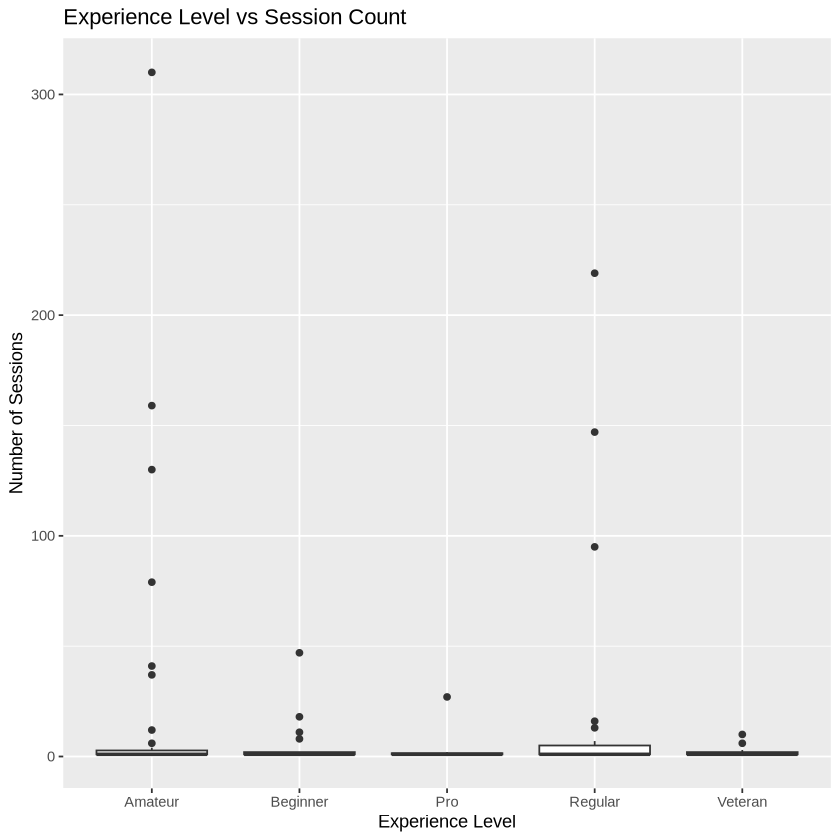

In [8]:
ggplot(players_extended, aes(experience, num_sessions)) +
  geom_boxplot() +
  labs(
    title = "Experience Level vs Session Count",
    x = "Experience Level",
    y = "Number of Sessions"
  )


In [ ]:
## Exploratory Insights

The histogram of session counts shows a strong right skew: most players contribute only a few sessions, while a smaller number of players contribute many. This means session count will require careful modelling, possibly with transformations or non-linear models.

The Age vs Sessions scatterplot suggests that younger players tend to cluster at lower session counts, but there are also older players with high contributions, indicating age alone is not a strong predictor.

Experience level appears to have some relationship with session count: more experienced players may contribute slightly more sessions on average, but the variation is large. These findings help narrow down which variables to consider for modelling.


In [ ]:
## (4) Methods and Plan

To answer the question of which player characteristics predict session contribution, I plan to use multiple linear regression as a baseline model. Session count is numeric, so regression is appropriate, and the model is interpretable, which is helpful when communicating back to the research team.

Because session count is highly skewed, I may consider transforming the response (e.g., log(num_sessions)) or trying a Poisson regression if appropriate. I will also compare a regularized model (ridge or lasso) to reduce overfitting.

### Assumptions
Regression assumes linearity, independence, and constant variance. These conditions may not fully hold due to skewness, which is why comparing different models is important.

### Data Processing Plan
I will:
1. Aggregate sessions using `hashedEmail`.
2. Merge with player data.
3. Split into training and testing sets (likely 70/30).
4. Use cross-validation to tune any regularized models.
5. Compare model performance using RMSE.


In [ ]:
## (5) GitHub Repository

Repository Link: https://github.com/jessicaliao238-max/DSCI-Project--Jessica
